# Projected Gradient-Descent

## Überblick

Bisher haben wir Gradient-Descent für nicht restringierte 
Optimierungsprobleme untersucht.
In diesem Abschnitt modifizieren wir Gradient-Descent so, dass wir es auch auf eine
bestimmte Klasse von restringierten Optimierungsproblemen anwenden können. Dazu 
kombinieren wir Gradient-Descent mit einer geeigneten Projektion auf
die zulässige Parametermenge $X\subset\mathbb{R}^d$.

## Grundlagen

In den Beispielen oben haben wir bereits Projected-Gradient-Descent benutzt, um  für $f\in C^1(\mathbb{R}^d)$  restringierte Optimierungsproblem näherungsweise zu lösen:
  \begin{align*}
  x_\ast  &= \mathrm{argmin}_{x\in X}f(x), \quad X\subset\mathbb{R}^d\\
  y_{t+1} &= x_{t} - \gamma_{t} f'(x_{t})\\
  x_{t+1} &= \mathrm{argmin}_{x\in X}\|x - y_{t+1}\|
  \end{align*}
  
Ist $x_{t+1}$ überhaupt wohldefiniert (Existenz, Eindeutigkeit)?

**Satz:** Ist $V$ eine Hilbert-Raum, $\emptyset \neq X\subset V$ konvex und abgeschlossen, dann existiert genau ein $y\in X$ (die Projektion von $x$ auf $X$) mit
  \begin{equation*} 
  \|x - y\| = \inf_{z\in X}\|z - y\|. 
  \end{equation*}
  Für $x\in V$ ist $y\in X$ die zugehörige Projektion, genau dann wenn
  \begin{equation*} 
  (x-y, z-y) \leq 0 \quad \forall z\in X.
  \end{equation*}

**Beweis:**

- Existenz von $y$:
  
  - sei $y_i\in X$ eine Folge mit
      \begin{equation*} 
      \lim_{i\to\infty}\|x - y_i\| = \inf_{z\in X}\|x - z\| =:d
      \end{equation*}
    
  - wegen $\|v\|^2 = (v,v)$ gilt die Parallelogrammgleichung
      \begin{equation*} 
      \|u+v\|^{2} + \|u-v\|^{2} = 2\big(\|u\|^{2}+\|v\|^{2}\big)
      \end{equation*}
    also
      \begin{equation*} 
      \|u-v\|^{2}=2\big(\|u\|^{2}+\|v\|^{2}\big)-\|u+v\|^{2}
      \end{equation*}
      
  - setzen wir nun
      \begin{equation*} 
      u = y_i -x, \quad v = y_j - x
      \end{equation*}
    dann folgt
      \begin{equation*} 
      \|y_{i}-y_{j}\|^{2}=
      2\big(\|y_{i}-x\|^{2}+\|y_{j}-x\|^{2}\big)-\|y_{i}+y_{j}-2 x\|^{2}
      \end{equation*}
      
  - wegen
      \begin{equation*} 
        \|y_{i}+y_{j}-2 x\|^{2} 
        =4\big\|\underbrace{\frac{y_{i}+y_{j}}{2}}_{\in X}-x\big\|^2 \geq 4 d^{2}
      \end{equation*}
    gilt
      \begin{equation*} 
        \|y_{i}-y_{j}\|^{2}  \leq 2\big(\|y_{i}-x\|^{2}+\|y_{j}-x\|^{2}\big)-4 d^{2}
      \end{equation*}
      
  - andererseits gibt es für alle $\varepsilon > 0$ ein $N_\varepsilon \in  \mathbb{N}$ mit
      \begin{equation*} 
      \|y_{k}-x\|^{2}  \leq d^2 + \varepsilon  \quad \forall k\geq N_\varepsilon 
      \end{equation*}
    und somit
      \begin{equation*} 
        \|y_{i}-y_{j}\|^{2}  
        \leq 2\big(d^2 + \varepsilon + d^2 + \varepsilon \big)-4 d^{2}
        = 4 \varepsilon
        \quad \forall i,j\geq N_\varepsilon 
      \end{equation*}
      
  - damit ist $y_i$ eine Cauchy-Folge
    
  - da $V$ vollständig ist gibt es ein $y\in V$ mit $y_i \xrightarrow{i\to\infty}y$
    
  - wegen $y_i \in X$, $X$ abgeschlossen, ist dann auch $y\in X$
    
- Eindeutigkeit von $y$:
  
  - für $y, \tilde{y} \in X$ gelte
      \begin{equation*} 
      d = \inf_{z\in X}\|z - x\| = \|y - x\| = \|\tilde{y} - x\|
      \end{equation*}    
    
  - da $X$ konvex ist gilt
      \begin{equation*} 
      \bar{y} = \frac{y + \tilde{y}}{2} \in X 
      \end{equation*}
    und mit der Parallelogrammgleichung folgt
      \begin{equation*} 
        \begin{aligned}
        \|\bar{y} - x\|^2 
        &=\big\|\frac{y+\tilde{y}}{2}-x\big\|^{2} \\
        &=\frac{1}{4} \| \underbrace{y-x}_{u}+\underbrace{\tilde{y}-x}_{v} \|^{2} \\
        &=\frac{1}{4}\|u+v\|^{2} \\
        &=\frac{1}{2}(\|u\|^{2}+\|v\|^{2})-\frac{1}{4}\|u-v\|^{2} \\
        &=\frac{1}{2}(\|y-x\|^{2}+\|\tilde{y}-x\|^{2})-\frac{1}{4}\|y-\tilde{y}\|^{2} \\
        &=d^{2}-\frac{1}{4}\|y-\tilde{y}\|^{2}
        \end{aligned}
      \end{equation*}
   
  - für $y \neq \tilde{y}$ ist
      \begin{equation*} 
      \|\bar{y} - x\|^2 < d^2
      \end{equation*}
    was ein Widerspruch zu $d = \inf_{z\in X}\|z - x\|$ ist    

- Ungleichung:
  
  - es sei $y\in X$ der eindeutige Minimierer und $d = \|y - x\| = \inf_{z\in X}\|z - x\|$:
    
    - da $X$ konvex ist gilt für alle $z\in X$ und alle $\lambda \in (0,1)$
        \begin{equation*} 
        (1-\lambda)y + \lambda z = y + \lambda(z-y) \in X
        \end{equation*}
      
    - damit folgt
        \begin{align*}
        \|y - x\|^2 = d^2
        & \leq \|y + \lambda(z-y) - x\|^2 \\
        & = \|y - x\|^2 +  \lambda^2\|z - y\|^2 + 2  \lambda(y-x, z-y)
        \end{align*}
      also
        \begin{equation*} 
        2  \lambda(x-y, z-y) \leq \lambda^2\|z - y\|^2
        \end{equation*}
      und wegen $\lambda > 0$
        \begin{equation*} 
        (x-y, z-y) \leq \frac{\lambda}{2}\|z - y\|^2
        \end{equation*}
        
    - durch Grenzübergang $\lambda \downarrow 0$ erhalten wir schließlich
        \begin{equation*} 
        (x-y, z-y) \leq 0 \quad \forall z\in X
        \end{equation*}
        
  - es sei nun $y\in X$ mit $(x-y, z-y) \leq 0 \ \forall z\in X$:
    
    - für $z\in X$, $z\neq y$, folgt dann
        \begin{align*} 
        \|x - z\|^2
        &= \|x - y  +  y - z\|^2\\
        &= \|x - y\|^2  +  \underbrace{\|y - z\|^2}_{> 0} 
        \:\underbrace{- 2(x-y, z-y)}_{\geq 0} \\
        &> \|x - y\|^2
        \end{align*}
        
    - somit ist $y$ Minimierer von $\|x - z\|$, $z\in X$
        
$\square$

Mit diesem Ergebnis machen die folgenden Definitionen Sinn.


**Definition:** Ist $V$ eine Hilbert-Raum, $\emptyset \neq X\subset V$ konvex und abgeschlossen, dann ist
  \begin{equation*} 
  d_X:V\to \mathbb{R}, \quad d_X(x) = \inf_{z\in X}\|z - x\|
  \end{equation*}
  der *Abstand* von $x$ zu $X$ und
  \begin{equation*} 
  \Pi_X:V\to X, \quad \Pi_X(x) = \mathrm{argmin}_{z\in X}\|z - x\|
  \end{equation*}
  die *Projektion* von $x$ auf $X$.

**Bemerkung:**

- wir lassen bei $d,\Pi$ den Index $X$ weg
  
- $\Pi$ ist wohldefiniert, wenn $V$ vollständig und die Norm auf $V$ strikt konvex ist
  
- wird die Norm von einem Skalarprodukt induziert, dann ist sie immer strikt konvex 
  
- ist dies nicht der Fall, kann man einfache Gegenbeispiele konstruieren:

**Beispiel:**

  - betrachte
      \begin{equation*} 
      V = \mathbb{R}^2, 
      \quad \|x\|_\infty = \max(|x_1|,|x_2|),
      \end{equation*}

  - $(V, \|\cdot\|_\infty)$ ist ein Banachraum, also ein vollständiger
      normierter Vektorraum
      
  - für die konvexe Menge
      \begin{equation*} 
      X = [-1,1]\times[-1,1]
      \end{equation*}
    und den Punkt $x = (2,0)^T$ erhalten wir
      \begin{equation*} 
      d(x) = \inf_{z\in X}\|z - x\|_\infty = \inf_{z\in X} \max(|z_1 - 2|,|z_2|)
      \end{equation*}
    
  - wegen $z_1 \in [-1,1]$ ist für alle $z\in X$ 
      \begin{equation*} 
      |z_1 - 2|\geq 1,
      \end{equation*}
    s.d. $d(x) \geq 1$
    
  - andererseits gilt für alle $z$ mit $z_1=1$ und $z_2 \in [-1,1]$
      \begin{equation*} 
      \|z - x\|_\infty = \max(|z_1 - 2|,|z_2|) = 1,
      \end{equation*}
    der minimale Abstand $d(x)=1$ wird also für alle diese $z$ angenommen
   
 - $d(x)$ ist also nach wie vor wohldefiniert, $\Pi(x)$ wegen der
   fehlenden Eindeutigkeit dagegen nicht

Jetzt betrachten wir einige wichtige Eigenschaften von $d$ und $\Pi$.


**Lemma:** Sind $V,X,d,\Pi$ wie oben definiert, dann gilt:

- $d:V\to \mathbb{R}$ ist konvex
  
- $\big(y - \Pi(y), x - \Pi(y) \big) \leq 0 \quad \forall x\in X, \ \forall y\in V$
  
- $\|\Pi(y) - \Pi(x)\| \leq \|y-x\| \quad \forall x,y \in V$
  
- $\|x - \Pi(y)\|^2 + \|y - \Pi(y) \|^2 \leq \|y-x\|^2 \quad \forall x\in X, \ \forall y\in V$

**Beweis:**

- Teil 1:
  
  - $x,y\in V$, $\bar{x} = \Pi(x)$, $\bar{y} = \Pi(y)$
    
  - $\bar{x}, \bar{y}\in X$ und da $X$ konvex ist gilt 
      \begin{equation*} 
      \bar{z} = (1-\lambda)\bar{x} + \lambda \bar{y} \in X \quad \forall \lambda \in [0,1]
      \end{equation*}
      
  - mit $u=(1-\lambda)x + \lambda y$ folgt
      \begin{align*}
      d\big((1-\lambda)x + \lambda y\big)
      & = \inf_{z\in X} \|z - u\| \\
      & \leq \|u - \bar{z}\| \\
      & = \|(1-\lambda)x + \lambda y - (1-\lambda)\bar{x} - \lambda \bar{y}\| \\
      & = \|(1-\lambda)(x-\bar{x}) + \lambda (y-\bar{y})\| \\
      & \leq (1-\lambda)\|x-\bar{x}\| + \lambda \|y-\bar{y}\| \\
      & = (1-\lambda) d(x) + \lambda d(y)
      \end{align*}

- Teil 2:
  
  - nach dem Satz von oben gilt für $y\in V$
      \begin{equation*} 
      \bar{y} \in X, \quad \|y-\bar{y}\|=\inf _{x \in X}\|y-x\| 
      \quad \Leftrightarrow \quad
      (y-\bar{y}, x-\bar{y}) \leq 0 \quad \forall x \in X
      \end{equation*}

  - mit $\bar{y}=\Pi(y)$ folgt die Behauptung
    
- Teil 3:
  
  - es sei wieder $x,y\in V$, $\bar{x} = \Pi(x)$, $\bar{y} = \Pi(y)$    
    
  - nach Teil 2 gilt
      \begin{equation*} 
      (x-\bar{x}, z-\bar{x}) \leq 0,
      \quad
      (y-\bar{y}, z-\bar{y}) \leq 0 
      \quad 
      \forall z \in X
      \end{equation*}
    
  - mit $z = \bar{y}$ folgt aus der ersten Ungleichung
      \begin{equation*} 
      (x-\bar{x}, \bar{y}-\bar{x}) \leq 0
      \quad\Rightarrow\quad
      (\bar{x}-x, \bar{x}-\bar{y}) \leq 0
      \end{equation*}
    und analog mit $z = \bar{x}$ in der zweiten Ungleichung
      \begin{equation*} 
      (y-\bar{y}, \bar{x}-\bar{y}) \leq 0
      \end{equation*}
    
  - Addition der beiden Ungleichungen liefert
      \begin{equation*} 
      (\bar{x}-x + y-\bar{y}, \bar{x}-\bar{y}) \leq 0
      \end{equation*}
    also
      \begin{equation*} 
      -(x-y, \bar{x}-\bar{y}) + \|\bar{x}-\bar{y}\|^2 \leq 0
      \end{equation*}
      
  - mit Cauchy-Schwarz folgt
      \begin{equation*} 
      \|\bar{x}-\bar{y}\|^2 
      \leq (x-y, \bar{x}-\bar{y})
      \leq \|x-y\| \ \|\bar{x}-\bar{y}\|
      \end{equation*}
    und somit
      \begin{equation*} 
      \|\bar{x}-\bar{y}\| \leq \|x-y\|
      \end{equation*}
      
- Teil 4:
  
  - $\forall v,w \in V$ gilt
      \begin{equation*} 
      \|v-w\|^2 = (v-w, v-w) = \|v\|^2 + \|w\|^2 - 2(v,w)
      \end{equation*}
    also
      \begin{equation*} 
      \|v\|^2 + \|w\|^2 - \|v-w\|^2 =  2(v,w)
      \end{equation*}
      
  - mit $v = x-\bar{y}$, $w = y-\bar{y}$ folgt
      \begin{equation*} 
      \|x-\bar{y}\|^2 + \|y-\bar{y}\|^2 - \|x-y\|^2
      = 2(x-\bar{y}, y-\bar{y})
      \leq 0
      \end{equation*}
      
$\square$

## Konvergenz

Wir werden jetzt analog zum einfachen Gradientenverfahren Konvergenzaussagen unter verschiedenen Voraussetzungen an $f$ beweisen. Dabei werden wir sehen, dass die asymptotischen Aussagen sich nicht verändern, d.h. die Projektion auf abgeschlossene konvexe Mengen hat keinen negativen Einfluss.

### Vorüberlegungen

Für $f\in C^1(\mathbb{R}^d)$, $X\subset\mathbb{R}^d$ 
  konvex und abgeschlossen, 
  wenden wir auf das  restringierte Optimierungsproblem
  \begin{equation*} 
  x_\ast  = \mathrm{argmin}_{x\in X}f(x)
  \end{equation*}
  Projected-Gradient-Descent
  \begin{equation*} 
  y_{t+1} = x_{t} - \gamma f'(x_{t}),
  \quad
  x_{t+1} = \Pi(y_{t+1})
  \end{equation*}
  mit konstanter Schrittweite $\gamma$ an, wobei $\Pi$ die
  Projektion in $\mathbb{R}^d$ auf $X$ bezüglich $(\cdot,\cdot)_2$ ist.
Wegen $y_{t+1} = x_t - \gamma f'_t$  gilt
  \begin{equation*} 
  \|y_{t+1}-x_{*}\|_{2}^{2} 
  =\|x_{t}-x_{*}\|_{2}^{2}+\gamma^{2}\|f_{t}^{\prime}\|_{2}^{2}-2
  \gamma f_{t}^{\prime}(x_{t}-x_{*})
  \end{equation*}
  und somit
  \begin{equation*} 
  f'_{t}\left(x_{t}-x_{*}\right) 
  =\frac{1}{2 \gamma}\left(\gamma^{2}\left\|f_{t}^{\prime}\right\|_{2}^{2}
  +\left\|x_{t}-x_{*}\right\|_{2}^{2}-\left\|y_{t+1}-x_{*}\right\|_{2}^{2}\right).
  \end{equation*}
Der einzige Unterschied zu Gradient-Descent ist $y_{t+1}$ statt $x_{t+1}$
  im letzten Term auf der rechten Seite.
  
Um diesen Term zu bearbeiten, greifen wir auf die Eigenschaften 
der Projektion $\Pi$ zurück.
Für $\Pi$ gilt
  \begin{equation*} 
  \|\Pi(y) - \Pi(x)\| \leq \|y-x\| \quad \forall x,y \in V
  \end{equation*}
bzw.
  \begin{equation*} 
  \Pi(x_\ast) = x_\ast
  \end{equation*}
und somit
  \begin{equation*} 
  \|x_{t+1}-x_{*}\|_{2}
   = \|\Pi(y_{t+1}) - \Pi(x_\ast)\|_2
  \leq  \|y_{t+1}-x_{*}\|_{2},
  \end{equation*}
bzw.
  \begin{equation*} 
  f'_{t}\left(x_{t}-x_{*}\right) 
  \leq\frac{1}{2 \gamma}\left(\gamma^{2}\left\|f_{t}^{\prime}\right\|_{2}^{2}
  +\left\|x_{t}-x_{*}\right\|_{2}^{2}-\left\|x_{t+1}-x_{*}\right\|_{2}^{2}\right).
  \end{equation*}
Wir erhalten also fast das selbe Ergebnis wie bei Gradient-Descent, nur
  dass jetzt das "$=$" durch "$\leq$" ersetzt wurde.

Ist $f$ konvex, dann gilt
  \begin{equation*} 
  f(y) \geq f(x) + f'(x)(y-x)
  \end{equation*}
und mit $y=x_\ast$, $x=x_t$
  \begin{equation*} 
  f_\ast \geq f_t + f'_t (x_\ast-x_t)
  \end{equation*}
bzw.
  \begin{align*}
  0  \leq f_t - f_\ast
  & \leq f'_t(x_t - x_\ast)\\
  & = \frac{1}{2 \gamma}\left(\gamma^{2}\left\|f_{t}^{\prime}\right\|_{2}^{2}
  +\left\|x_{t}-x_{*}\right\|_{2}^{2}-\left\|y_{t+1}-x_{*}\right\|_{2}^{2}\right)\\
  & \leq\frac{1}{2 \gamma}\left(\gamma^{2}\left\|f_{t}^{\prime}\right\|_{2}^{2}
  +\left\|x_{t}-x_{*}\right\|_{2}^{2}-\left\|x_{t+1}-x_{*}\right\|_{2}^{2}\right).
  \end{align*}

### Lipschitz-Stetigkeit

$f\in C^1(\mathbb{R}^d)$ sei konvex und zusätzlich Lipschitz-Stetigkeit 
  mit Konstante $L_f$, also
  \begin{equation*} 
  \|f(y) - f(x)\| \leq L_f \|y - x\| 
  \end{equation*}
was äquivalent ist zu
  \begin{equation*} 
  \|f'(x)\| \leq L_f .
  \end{equation*}

Wie bei Gradient-Descent folgt
  \begin{align*}
  \sum_{t=0}^{T-1} (f_t - f_\ast)
  &\leq 
  \sum_{t=0}^{T-1} f'_t(x_t - x_\ast)\\
  &\leq \frac{\gamma}{2}T L_f^2 
  + \frac{1}{2\gamma} 
  \big( 
  \underbrace{\|x_{0}-x_{*}\|_{2}^{2}}_{e_0^2}
  -
  \underbrace{\|x_{T}-x_{*}\|_{2}^{2}}_{\geq 0}
  \big)\\
  &\leq \frac{\gamma T L_f^2}{2} + \frac{e_0^2}{2\gamma}.
  \end{align*}
  

**Satz:** $f:\mathbb{R}^d\to \mathbb{R}$, konvex, $C^1$, L-stetig mit Konstante $L_f$
  und es existiere $x_\ast = \mathrm{argmin}_{x\in\mathbb{R}^d}f(x)$.
  Mit $\gamma = \frac{c}{T^\omega}$, $\omega\in(0,1)$, gilt
  \begin{align*} 
  \min_{t=0,\ldots,T-1}(f_t - f_\ast)
  &\leq \frac{1}{T} \sum_{t=0}^{T-1} (f_t - f_\ast)\\
  &= \mathcal{O}\Big(\big(\frac{1}{T}\big)^{\min(\omega,1-\omega)}\Big)
  \quad 
  \text{für}
  \quad
  T\to\infty.
  \end{align*}
  Die optimale Ordnung ist $\frac{1}{2}$ für $\omega=\frac{1}{2}$.
  Mit $e_0 = \|x_0 - x_\ast\|$, $\gamma = \frac{e_0}{L_f\sqrt{T}}$ gilt außerdem
  \begin{equation*} 
  \min_{t=0,\ldots,T-1}(f_t - f_\ast)
  \leq \frac{1}{T} \sum_{t=0}^{T-1} (f_t - f_\ast)
  \leq \frac{L_f e_0}{\sqrt{T}}.
  \end{equation*}  

### $L$-Glattheit

Wir leiten zuerst eine neue Version des Descent-Lemmas her.
Dazu starten wir mit der $L$-Glattheit von $f$
  \begin{equation*} 
  f_{t+1} \leq f_{t}+f_{t}^{\prime}(x_{t+1}-x_{t})+\frac{L}{2}\|x_{t+1}-   x_{t}\|_{2}^{2}
  \end{equation*}
benutzen
  \begin{equation*} 
  y_{t+1} = x_t - \gamma f'_t
  \end{equation*}
bzw.
  \begin{equation*} 
  f'_t = \frac{1}{\gamma}(x_t - y_{t+1})
  \end{equation*}
und erhalten
  \begin{equation*} 
  f_{t+1} 
  \leq f_{t}
    - \frac{1}{\gamma}
    (\underbrace{y_{t+1} - x_t}_u)^T
    (\underbrace{x_{t+1} - x_t}_v) 
    + \frac{L}{2}\|x_{t+1}-   x_{t}\|_{2}^{2}.
  \end{equation*}

Wegen $2u^Tv = 2(u,v)_2 = \|u\|_2^2 + \|v\|_2^2 - \|u-v\|_2^2$ folgt
  \begin{align*}
  f_{t+1} 
  & \leq f_{t}
    - \frac{1}{2 \gamma}
    \big(
    \|y_{t+1}-x_{t}\|_{2}^{2}
    + \|x_{t+1}-x_{t}\|_{2}^{2}
    - \|y_{t+1}-x_{t+1}\|_{2}^{2}
    \big)      
    +\frac{L}{2}\|x_{t+1}-x_{t}\|_{2}^{2} \\
  &= f_{t}
      -\frac{1}{2 \gamma}
      \big(
      \gamma^{2}\|f_{t}^{\prime}\|_{2}^{2}
      +\|x_{t+1}-x_{t}\|_{2}^{2}
      -\|y_{t+1}-x_{t+1}\|_{2}^{2}
      \big) 
      +\frac{L}{2}\|x_{t+1}-x_{t}\|_{2}^{2} \\
  &= f_{t}
      -\frac{\gamma}{2}\|f'_{t}\|_{2}^{2} 
      +\frac{1}{2 \gamma}\|y_{t+1}-x_{t+1}\|_{2}^{2} 
      +\frac{1}{2}\big(L-\frac{1}{\gamma}\big)\|x_{t+1}-x_{t}\|_{2}^{2}.
  \end{align*}
  
Für $0<\gamma \leq \frac{1}{L}$ ist $L-\frac{1}{\gamma}\leq 0$ und wir erhalten das folgende Ergebnis.


**Descent-Lemma:** Ist $f:\mathbb{R}^d\to \mathbb{R}$ $L$-glatt und
  $0 < \gamma \leq \frac{1}{L}$, dann gilt für Projected-Gradient-Descent
  \begin{equation*} 
  f_{t+1} 
  \leq
  f_{t}
      -\frac{\gamma}{2}\|f'_{t}\|_{2}^{2} 
      +\frac{1}{2 \gamma}\|y_{t+1}-x_{t+1}\|_{2}^{2} .
  \end{equation*}

**Bemerkung:**

- bei Gradient-Descent war
    \begin{equation*} 
    f_{t+1} 
    \leq f_{t}-\beta\|f_{t}^{\prime}\|_2^{2},
    \quad
    \beta = \gamma\big(1-\frac{\gamma L}{2}\big),
    \end{equation*}
  so dass die $f_t$ bei $0<\gamma < 2/L$ monoton fallend waren
    
- bei Projected-Gradient-Descent haben wir auf der rechten Seite den
  nicht-negativen Zusatzterm
    \begin{equation*} 
    \frac{1}{2 \gamma}\|y_{t+1}-x_{t+1}\|_{2}^{2}, 
    \end{equation*}
  so dass wir zunächst nichts über die Monotonie der $f_t$ aussagen können
    
- man kann aber trotzdem zeigen, dass die $f_t$ auch hier 
  (wenn $\gamma$ kurz genug ist) monoton fallen (Übung)

Aus den Vorüberlegungen wissen wir ($f$ konvex)
  \begin{align*}
  0  \leq f_t - f_\ast
  & \leq f'_t(x_t - x_\ast)\\
  & = \frac{1}{2 \gamma}(\gamma^{2}\|f_{t}^{\prime}\|_{2}^{2}
  +\|x_{t}-x_{*}\|_{2}^{2}-\|y_{t+1}-x_{*}\|_{2}^{2}).
  \end{align*}

Laut Descent-Lemma ist
  \begin{equation*} 
  \|f'_{t}\|_{2}^{2} 
  \leq \frac{2}{\gamma}
  \big(
  f_{t} - f_{t+1} 
      +\frac{1}{2 \gamma}\|y_{t+1}-x_{t+1}\|_{2}^{2}
  \big)
  \end{equation*}
und oben eingesetzt folgt
  \begin{equation*} 
  f_t - f_\ast
  \leq 
  f_{t} - f_{t+1} 
  +\frac{1}{2 \gamma}
  \big(
  \|y_{t+1}-x_{t+1}\|_{2}^{2} + \|x_{t}-x_{*}\|_{2}^{2}-\|y_{t+1}-x_{*}\|_{2}^{2}
  \big).
  \end{equation*}
  
Wegen der Eigenschaft
  \begin{equation*} 
  \|x - \Pi(y)\|^2 + \|y - \Pi(y) \|^2 \leq \|y-x\|^2 
  \quad \forall x\in X, \ \forall y\in V\end{equation*}
der Projektion $\Pi$ und $x_\ast \in X$ folgt
mit $y = y_{t+1}$, $x=x_\ast$
  \begin{align*}
  \|y_{t+1}-x_{t+1}\|_{2}^2
  &= \|y_{t+1} - \Pi(y_{t+1})\|_2^2 \\
  &\leq \|y_{t+1} - x_\ast\|_2^2  - \|x_\ast - \Pi(y_{t+1})\|_2^2 \\
  &  =  \|y_{t+1} - x_\ast\|_2^2  - \|x_{t+1} - x_\ast\|_2^2 
  \end{align*}
so dass
  \begin{equation*} 
  f_t - f_\ast
  \leq 
  f_{t} - f_{t+1} 
  +\frac{1}{2 \gamma}
  \big(
  \|x_{t}-x_{*}\|_{2}^{2}-\|x_{t+1}-x_{*}\|_{2}^{2}
  \big).
  \end{equation*}

Durch Summation erhalten wir
  \begin{equation*} 
  \sum_{t=0}^{T-1}(f_t - f_\ast)
  \leq
  f_0 - f_T   
  +\frac{1}{2 \gamma}
  \big(
  \|x_{0}-x_{*}\|_{2}^{2}-\|x_{T}-x_{*}\|_{2}^{2}
  \big).
  \end{equation*}
  
Benutzen wir jetzt noch
  \begin{equation*} 
  f_0 - f_T = (f_0 - f_\ast) - (f_T - f_\ast),
  \quad
  \|x_{T}-x_{*}\|_{2}^{2} \geq 0
  \end{equation*}
dann ist
  \begin{equation*} 
  \sum_{t=1}^{T}(f_t - f_\ast)
  \leq \frac{1}{2 \gamma} \|x_{0}-x_{*}\|_{2}^{2}.
  \end{equation*}  
  
Nach dem Descent-Lemma und der daran anschließenden Bemerkung gilt
  $f_{t+1} \leq f_t$ und somit
  \begin{equation*} 
  f_T - f_\ast
  \leq\frac{1}{T}\sum_{t=1}^{T}(f_t - f_\ast)
  \leq \frac{1}{2 \gamma T} \|x_{0}-x_{*}\|_{2}^{2}.
  \end{equation*}

**Satz:** $f:\mathbb{R}^d\to \mathbb{R}$, konvex, $L$-glatt mit Konstante $L$
  und es existiere $x_\ast = \mathrm{argmin}_{x\in X}f(x)$. 
Ist  $0 < \gamma \leq \frac{1}{L}$ dann gilt für Projected-Gradient-Descent
  \begin{equation*} 
  f_{T}-f_\ast 
  \leq \frac{1}{2 \gamma T} \|x_{0}-x_{*}\|_{2}^{2}
  = \mathcal{O}\big( \frac{1}{T} \big)
  \quad \text{für}\quad  T\to\infty .
  \end{equation*}

### $\mu$-Konvexität

Ist $f$ $\mu$-konvex mit $\mu\geq 0$, dann gilt
  \begin{equation*} 
  f_\ast \geq f_t + f'_t(x_\ast-x_t) + \frac{\mu}{2} \|x_\ast-x_t\|_2^2
  \end{equation*}
bzw.
  \begin{equation*} 
  f_t - f_\ast \leq f'_t(x_t - x_\ast)   - \frac{\mu}{2} \|x_t - x_\ast\|_2^2.
  \end{equation*}
Aus den Vorüberlegungen wissen wir
  \begin{equation*} 
  f'_{t}\left(x_{t}-x_{*}\right) 
  =\frac{1}{2 \gamma}\left(\gamma^{2}\left\|f_{t}^{\prime}\right\|_{2}^{2}
  +\left\|x_{t}-x_{*}\right\|_{2}^{2}-\left\|y_{t+1}-x_{*}\right\|_{2}^{2}\right).
  \end{equation*}
Wegen
  \begin{equation*} 
  \|x - \Pi(y)\|^2 + \|y - \Pi(y)\|^2 \leq \|x - y\|^2
  \quad
  \forall x\in X
  \quad 
  \forall y\in V
  \end{equation*}
folgt mit $y = y_{t+1}$, $x=x_\ast$, $\Pi(y_{t+1})=x_{t+1}$
  \begin{equation*} 
  \|x_\ast - x_{t+1}\|_{2}^2 + \|y_{t+1} - x_{t+1}\|_{2}^2
  \leq  \|x_\ast -  y_{t+1}\|_{2}^2
  \end{equation*}
also
  \begin{equation*} 
  - \|y_{t+1} - x_\ast\|_{2}^2 
  \leq - \|x_{t+1} - x_\ast\|_{2}^2 - \|y_{t+1} - x_{t+1}\|_{2}^2.
  \end{equation*}

Oben eingesetzt erhalten wir nun
  \begin{align*}
  f_t - f_\ast 
  &\leq f'_t(x_t - x_\ast) - \frac{\mu}{2} \|x_t - x_\ast\|_2^2\\
  &\leq \frac{1}{2 \gamma}
    \big(
    \gamma^{2} \|f'_{t}\|_{2}^{2}  
    + \|x_{t}-x_{*}\|_{2}^{2}
    - \|x_{t+1}-x_{*}\|_{2}^{2}
    - \|y_{t+1} - x_{t+1}\|_{2}^2
    \big)
    \\
    &\quad - \frac{\mu}{2} \|x_t - x_\ast\|_2^2
  \end{align*}
also
  \begin{align*} 
  2\gamma (f_t - f_\ast)
  & \leq
  \gamma^{2} \|f'_{t}\|_{2}^{2}  
    + (1-\gamma\mu)\|x_{t}-x_{*}\|_{2}^{2}
    \\
    &\quad
    - \|x_{t+1}-x_{*}\|_{2}^{2}
    - \|y_{t+1} - x_{t+1}\|_{2}^2
  \end{align*}
bzw.
  \begin{align*} 
  \|x_{t+1}-x_{*}\|_{2}^{2}
  &\leq
  2\gamma (f_\ast - f_t)
  + \gamma^{2} \|f'_{t}\|_{2}^{2}
  - \|y_{t+1} - x_{t+1}\|_{2}^2
  \\
  &\quad
  + (1-\gamma\mu)\|x_{t}-x_{*}\|_{2}^{2}.
  \end{align*}

Die ersten drei Terme auf der rechten Seite schätzen wir wieder mit dem Descent-Lemma ab.
Wegen
  \begin{equation*} 
  f_{t+1} 
  \leq
  f_{t}
      -\frac{\gamma}{2}\|f'_{t}\|_{2}^{2} 
      +\frac{1}{2 \gamma}\|y_{t+1}-x_{t+1}\|_{2}^{2} 
  \end{equation*}
ist
  \begin{equation*} 
  f_\ast - f_t
  \leq
  f_{t+1} - f_t
  \leq
  -\frac{\gamma}{2}\|f'_{t}\|_{2}^{2} 
      +\frac{1}{2 \gamma}\|y_{t+1}-x_{t+1}\|_{2}^{2} 
  \end{equation*}
und somit
  \begin{equation*} 
  \|x_{t+1}-x_{*}\|_{2}^{2}
  \leq (1-\gamma\mu)\|x_{t}-x_{*}\|_{2}^{2}.
  \end{equation*}
  
Analog zu Gradient-Descent haben wir damit folgendes Ergebnis gezeigt.


**Satz:** $f:\mathbb{R}^d\to \mathbb{R}$, $\mu$-konvex mit $\mu>0$, $L$-glatt 
mit Konstante $L$ und es existiere $x_\ast = \mathrm{argmin}_{x\in X}f(x)$.
Für  $0 < \gamma \leq \frac{1}{L}$ folgt
  \begin{equation*} 
  \|x_{t+1}-x_{*}\|_{2}^2 \leq \rho \|x_{t}-x_{*}\|_{2}^2
  \end{equation*}
und
  \begin{equation*} 
  f_T - f_\ast \leq \frac{L}{2} \rho^T \|x_{0}-x_{*}\|_{2}^2
  \end{equation*}
mit
  \begin{equation*} 
  \rho = 1-\gamma\mu \in [0,1) .
  \end{equation*}

## Projektionsoperatoren

In den vorherigen Abschnitten haben wir gesehen, dass wir für Projected-Gradient-Descent
exakt die selben asymptotischen Resultate erhalten wie bei gewöhnlichem Gradient-Descent.
Das sieht zunächst sehr angenehm aus,
für den praktischen Einsatz muss man allerdings bedenken, dass in jedem
Schritt eine Projektion
  \begin{equation*} 
  x_{t+1} = \Pi_X(y_{t+1}),
  \quad \Pi_X(x) = \mathrm{argmin}_{z\in X}\|z - x\|
  \end{equation*}
auf die abgeschlossene, konvexe Menge $X$ zu berechnen ist.
  
Das Berechnen von $\Pi(x)$ ist also selbst ein restringiertes konvexes
  Optimierungsproblem mit einer  "einfachen" konvexen Zielfunktion
  $x\to\|z - x\|$.
Für allgemeine abgeschlossene und konvexe Menge $X$ kann die Lösung
  dieses Problems extrem schwierig werden, für spezielle $X$, die in der Praxis häufig auftauchen, kann
  man $\Pi_X$ dagegen explizit angeben.
  
Wir untersuchen einige $X\subset \mathbb{R}^d$ nun genauer. 
Dabei betrachten wir jeweils Projektionen bezüglich des euklidischen
Skalarprodukts $(\cdot,\cdot)_2$.

### Kugel in der 2-Norm

- wir betrachten
\begin{equation*} 
X 
= \bar{B}_r(0)_{\|\cdot\|_2}
= \big\{ x \ \big| \ x\in\mathbb{R}^d,\ \|x\|_2\leq r \big\}
\end{equation*}

- $X$ ist offensichtlich konvex und abgeschlossen

- die Projektion auf $X$ ist
\begin{equation*} 
\Pi_X(x) =
\begin{cases}
x & \|x\|_2 \leq  r \\
\frac{x}{\|x\|_2} r & \|x\|_2 > r 
\end{cases}
\end{equation*}

- mit $\bar{x} = \Pi_X(x)$ ist zu zeigen, dass
\begin{equation*} 
(x - \bar{x}, z - \bar{x})_2 \leq 0 \quad \forall z \in X
\end{equation*}

- für $x\in X$ ist $\bar{x}=x$, also
\begin{equation*} 
(x - \bar{x}, z - \bar{x})_2 
= (x - x, z - x)_2 
= 0 \quad \forall z \in X
\end{equation*}

- für $x\notin X$, also $\|x\|_2>r$, ist $\bar{x}=\frac{x}{\|x\|_2} r$ und somit
\begin{align*}
(x - \bar{x}, z - \bar{x})_2 
&   =  \big( x - \frac{x}{\|x\|_2} r, z - \frac{x}{\|x\|_2} r \big)_2 \\
&   =  (x,z)_2 + r^2 - \big( x , \frac{x}{\|x\|_2} r \big)_2 - \big(\frac{x}{\|x\|_2} r , z\big)_2 \\
&   =  (x,z)_2 + r^2 - \|x\|_2 r - \frac{r}{\|x\|_2} (x, z)_2 \\
&   =  \big(\underbrace{1 - \frac{r}{\|x\|_2}}_{>0}\big)(x,z)_2 + r^2 - r \|x\|_2 \\
& \leq \big(1 - \frac{r}{\|x\|_2}\big)\|x\|_2 \underbrace{\|z\|_2}_{\leq r} + r^2 - r \|x\|_2 \\
& \leq r \|x\|_2 -  r^2 + r^2 - r \|x\|_2\\
&   =  0
\end{align*}

### Nicht negativer Kegel

- der Kegel
    \begin{equation*} 
    X
    = \big\{ x \ \big| \ x\in\mathbb{R}^d,\ x_i \geq 0, \  i=1,\ldots,d \big\}
    \end{equation*}
  ist konvex und abgeschlossen

- die Projektion auf $X$ ist definiert durch
    \begin{equation*} 
    \bar{x} = \Pi_X(x),
    \quad
    \bar{x}_i
    =
    \begin{cases}
    x_i & x_i \geq 0 \\
     0  & x_i < 0
    \end{cases}
    \end{equation*}

- für $z\in X$ folgt dann
    \begin{align*}
    (x - \bar{x}, z - \bar{x})_2 
    &   =  \sum_{i=1}^d (x_i - \bar{x}_i) (z_i - \bar{x}_i) \\
    &   =  \sum_{x_i<0} \underbrace{x_i}_{<0}\ \underbrace{z_i}_{\geq 0} \\
    & \leq  0
    \end{align*}

### Kugel in der 1-Norm

- wir betrachten
  \begin{equation*} 
  X_r 
  = B_r(0)_{\|\cdot\|_1}
  = \big\{ x \ \big| \ x\in\mathbb{R}^d,\ \|x\|_1 = \sum_{i=1}^d |x_i|\leq r \big\}
  \end{equation*}

- $X_r$ ist damit konvex und abgeschlossen und die Projektion $\Pi$ auf $X_r$ 
  bezüglich der Norm $\|\cdot\|_2$ ist wohldefiniert:
  \begin{equation*} 
  \Pi(v) = \mathrm{argmin}_{\|y\|_1\leq r} \|v - y\|_2
  \end{equation*}

- wegen $\Pi(v) = v$ für $\|v\|_1\leq r$ reicht es, wenn wir ab jetzt Vektoren
  \begin{equation*} 
  v\in\mathbb{R}^d,
  \quad
  \|v\|_1 > r
  \end{equation*}
  betrachten

- für diese gilt $\|\Pi(v)\|_1 = r$, d.h. die Projektion liegt auf dem Rand von $X_r$:

  - Annahme: $\|\Pi(v)\|_1 < r$
  
  - wegen $\|v\|_1 > r > \|\Pi(v)\|_1$ gilt 
      \begin{equation*} 
      \lambda = \frac{r - \|\Pi(v)\|_1}{\|v\|_1 -\|\Pi(v)\|_1} \in (0,1)
      \end{equation*}  

  - für
      \begin{equation*} 
      x = (1-\lambda) \Pi(v) + \lambda v 
      \end{equation*}
    erhalten wir
      \begin{align*}
      \|x\|_1
      &\leq (1-\lambda) \|\Pi(v)\|_1 + \lambda \|v\|_1 \\
      & = \|\Pi(v)\|_1 + \lambda \big(\|v\|_1 -\|\Pi(v)\|_1\big)\\
      & = \|\Pi(v)\|_1 + \frac{r - \|\Pi(v)\|_1}{\|v\|_1 -\|\Pi(v)\|_1} \big(\|v\|_1 -\|\Pi(v)\|_1\big)\\
      & = r
      \end{align*}
  
  - andererseits gilt
      \begin{equation*} 
      x - v = (1-\lambda)\big(\Pi(v)-v\big), \quad \lambda\in(0,1) 
      \end{equation*}
    und somit
      \begin{equation*} 
      \|x - v\|_2 = (1-\lambda) \|\Pi(v)-v\|_2 < \|\Pi(v)-v\|_2,
      \end{equation*}
    was ein Widerspruch zu
      \begin{equation*} 
      \Pi(v) = \mathrm{argmin}_{\|y\|_1\leq r} \|v - y\|_2
      \end{equation*}
    ist

- wir werden jetzt die Menge der zu betrachtenden Vektoren $v$ weiter einschränken

- ist $L:\mathbb{R}^d\to\mathbb{R}^d$ eine lineare Abbildung mit
  \begin{equation*} 
  \|Lw\|_1 = \|w\|_1,
  \quad
  \|Lw\|_2 = \|w\|_2
  \quad \forall w\in \mathbb{R}^d
  \end{equation*}
  dann ist $L$ umkehrbar und es gilt für $x = \Pi(w)$
  \begin{equation*} 
  Lx = \Pi(Lw)
  \end{equation*}
  bzw.
  \begin{equation*} 
  x = L^{-1}\Pi(Lw)
  \end{equation*}  
  denn
  \begin{align*}
  \| Lw - Lx\|_2
  &= \| L(w - x)\|_2 \\
  &= \| w - x\|_2 \\
  &= \min_{\|y\|_1\leq r} \|w - y\|_2 \\
  &= \min_{\|y\|_1\leq r} \|Lw - Ly\|_2 \\
  &= \min_{\|L^{-1}z\|_1\leq r} \|Lw - z\|_2 \\
  &= \min_{\|z\|_1\leq r} \|Lw - z\|_2 \\
  \end{align*}  

- die Abbildung
  \begin{equation*} 
  Sw = (s_1 w_1,\ldots,s_d w_d)^T,
  \quad
  s_i = \pm 1
  \end{equation*}
  besitzt diese Eigenschaften:
  
  - für $v\in\mathbb{R}^d$,
    \begin{equation*} 
    s_i = 
    \begin{cases}
    1  & v_i \geq 0\\
    -1 & v_i<0
    \end{cases},
    \end{equation*}
    folgt dann
    $Sv = (|v_1|,\ldots,|v_d|)^T=|v|$ (komponentenweise) und
    \begin{equation*} 
    x = \Pi(v) = S^{-1}\Pi(Sv) = S^{-1}\Pi(|v|),
    \end{equation*}
    so dass es genügt, die Projektion für Vektoren $v$ mit $v_i\geq 0$ zu betrachten

- die Abbildung
  \begin{equation*} 
  Pw = (w_{\pi(1)},\ldots,w_{\pi(d)})^T
  \end{equation*}
  wobei $\pi$ eine beliebige Permutation der Indizes
  $1,\ldots,d$ ist, besitzt ebenfalls die oben beschriebenen Eigenschaften:
  
  - für $v\in\mathbb{R}^d$ betrachten wir jetzt eine Permutation $\pi$,
    die die Komponenten von $v$ absteigend sortiert, also
    \begin{equation*} 
    v_{\pi(1)} \geq v_{\pi(2)} \geq \ldots \geq v_{\pi(d)}
    \end{equation*} 
    und erhalten
    \begin{equation*} 
    x = \Pi(v) = P^{-1}\Pi(Pv),
    \end{equation*}
    so dass es genügt, die Projektion für Vektoren $v$ zu betrachten,
    deren Komponenten absteigend sortiert sind

- wir müssen jetzt also nur noch Vektoren $v\in \mathbb{R}^d$ betrachten mit
    \begin{equation*} 
    \|v\|_1 > r,
    \quad
    v_1 \geq v_2 \geq \ldots \geq v_d \geq 0
    \end{equation*}
  und wissen bereits, dass
    \begin{equation*} 
    \|\Pi(v)\|_1 = r
    \end{equation*}
  ist

- unter diesen Voraussetzungen gilt für $x = \Pi(v)$ auch $x_i\geq 0$:

  - Annahme: es existiere ein $x_k<0$
  
  - mit
      \begin{equation*} 
      y = (x_1, \ldots, x_{k-1}, -x_k, x_{k+1},\ldots, x_d)^T
      \end{equation*}
    ist $\|y\|_1 = \|x\|_1 = r$ und wegen $x_k < 0 \leq v_k$
      \begin{align*}
      \|v - y\|_2^2
      &= \sum_{i=1}^d (v_i - y_i)^2 \\
      &= (v_k + x_k)^2 + \sum_{i\neq k} (v_i - x_i)^2 \\
      &< (v_k - x_k)^2 + \sum_{i\neq k} (v_i - x_i)^2 \\
      &= \|v - x\|_2^2
      \end{align*}
    was ein Widerspruch zu $x=\Pi(v)$ ist
  
  
- somit folgt unter diesen Voraussetzungen an $v$
  \begin{align*} 
  \Pi(v) 
  & = \mathrm{argmin}_{x\in Y_r}\|v - x\|_2,
  \\
  Y_r &= \Big\{x \ \big| \ x\in\mathbb{R}^d, \ x_i\geq 0, \ i=1,\ldots,d,\ \sum_{i=1}^d x_i = r \Big\},
  \end{align*}
  wobei $Y_r$ wieder konvex ist

- wir zeigen jetzt, dass ein eindeutiger Index $p \in \{1,\ldots,d\}$ existieren muss
  mit $x_i>0$ für $i\leq p$ und $x_i=0$ für $i>p$:

  - $x = \Pi(v)$ minimiert die konvexe differenzierbare Funktion $f(y) = \frac{1}{2}\|y - v\|_2^2$
    über der konvexen Menge $Y_r$, weshalb
    \begin{equation*} 
    0 \leq f'(x)(y-x) = (x - v)^T(y-x) \quad \forall y\in Y_r
    \end{equation*}
    gelten muss, also
    \begin{equation*} 
    0 \leq \sum_{i=1}^d (x_i - v_i)(y_i-x_i)\quad \forall y\in Y_r
    \end{equation*}
    
  - nach oben wissen wir, dass $\|x\|_1 = r > 0$, $x_i \geq 0$, $i=1,\ldots,d$, ist, 
    d.h. es existiert ein Index $k$ mit $x_k>0$
    
  - nehmen wir nun an, dass ein Index $j$ existiert mit $x_j=0$ und $x_{j+1} > 0$
  
  - definieren wir für $\varepsilon>0$ 
    \begin{equation*} 
    y = (x_1, \ldots, x_{j-1}, \varepsilon, x_{j+1} - \varepsilon, x_{j+2}, \ldots, x_d)^T
    \end{equation*}
    dann ist $y_i \geq 0$, $i = 1,\ldots,d$, $\|y\|_1 = \|x\|_1 = r$, also $y\in Y_r$, und
    \begin{align*}
    \sum_{i=1}^d (x_i - v_i)(y_i-x_i)
    &= (x_j - v_j)(y_j - x_j) + (x_{j+1} - v_{j+1})(y_{j+1} - x_{j+1}) \\
    &= - v_j\varepsilon - (x_{j+1} - v_{j+1})\varepsilon \\
    &= \varepsilon (\underbrace{v_{j+1} - v_j}_{\leq 0} - \underbrace{x_{j+1}}_{>0}) \\
    & < 0
    \end{align*}
    was ein Widerspruch zu
    \begin{equation*} 
    0 \leq \sum_{i=1}^d (x_i - v_i)(y_i-x_i)\quad \forall y\in Y_r
    \end{equation*}
    ist
    
  - damit kann der Fall $x_j=0$, $x_{j+1}>0$ nicht auftreten
    
  - wegen $\|x\|_1 = r > 0$ muss $x\neq 0$ sein, weshalb es einen Index $p$ gibt mit $x_i>0$ für $i\leq p$ und $x_i = 0$ für $i > p$

- für $x = x(p) =\Pi(v)$ gilt 
  \begin{align*} 
  x_i 
  & = 
  \begin{cases}
  v_i - c_p > 0 & i=1,\ldots,p \\
  0 & i=p+1,\ldots,d
  \end{cases},
  \\
  c_p &= \frac{1}{p}\big(\sum_{i=1}^p v_i  - r \big)
  \end{align*}

  - Annahme: es existiere ein Index $j<p$ mit $x_j - v_j \neq x_{j+1}-v_{j+1}$
  
    - ohne Einschränkung können wir $x_j - v_j < x_{j+1}-v_{j+1}$ annehmen

    - wegen $j<p$ ist $x_j>0$, so dass für $0<\varepsilon\leq x_j$ 
    \begin{equation*} 
    y = (x_1, \ldots, x_{j-1}, x_j - \varepsilon, 
         x_{j+1} + \varepsilon, x_{j+2}, \ldots, x_d)^T 
    \in Y_r
    \end{equation*}

    - analog zum letzten Abschnitt erhalten wir
    \begin{align*}
    (x - v)^T(y - x)
    &= (x_j - v_j)(y_j - x_j) + (x_{j+1} - v_{j+1})(y_{j+1} - x_{j+1}) \\
    &= (x_j - v_j)\varepsilon - (x_{j+1} - v_{j+1})\varepsilon \\
    & < 0
    \end{align*}
    was erneut ein Widerspruch zu
    \begin{equation*} 
    0 \leq (x - v)^T(y - x)\quad \forall y\in Y_r
    \end{equation*}
    ist
    
  - damit ist also 
    \begin{equation*} 
    x_i = 
    \begin{cases}
    v_i - c_p > 0 & i=1,\ldots,p \\
    0 & i=p+1,\ldots,d
    \end{cases}
    \end{equation*}
    
  - wegen $x\in Y_r$ gilt 
   \begin{align*} 
   r 
   &= \|x\|_1 
   = \sum_{i=1}^d |x_i| 
   = \sum_{i=1}^p x_i
   \\
   &= \sum_{i=1}^p (v_i - c_p)
   \\
   &= \big(\sum_{i=1}^p v_i\big) - p c_p
   \end{align*}
   und somit
   \begin{equation*} 
   c_p = \frac{1}{p}\big(\sum_{i=1}^p v_i  - r\big)
   \end{equation*}

- zum Schluss muss jetzt noch der Index $p$ bestimmt werden

- es gilt $\Pi(v)=x(p_\ast)$ für 
  \begin{equation*} 
  p_\ast = \mathrm{argmax}_{p\in\{1,\ldots,d\}}\{v_p - c_p > 0\}
  \end{equation*}
  
  - für jedes $p\in\{1,\ldots,d\}$ ist
    \begin{align*} 
    x_i 
    & = 
    \begin{cases}
    v_i - c_p > 0 & i=1,\ldots,p \\
    0 & i=p+1,\ldots,d
    \end{cases},
    \\
    c_p 
    & = 
    \frac{1}{p}\big(\sum_{i=1}^p v_i  - r \big)
    \end{align*}
    eindeutige Lösung von
    \begin{equation*} 
    \mathrm{argmin}_{z\in Z_p}\|z - v\|_2^2
    \end{equation*}
    mit
    \begin{equation*} 
    Z_p = \big\{ z \ \big | \ z\in\mathbb{R}^d, z_i\geq 0, \ z_i = 0 \ \forall i>p, 
                \ \|z\|_1 = \sum_{i=1}^p z_i = r \big\} \subset Y_r,
    \end{equation*}
    denn $Z_p$ ist abgeschlossen und konvex, $f(z) =  \|z - v\|_2^2$ ist konvex 
    und für alle
    $z \in Z_p$ gilt
    \begin{align*} 
    f'(x)(z - x)
    & = (x - v)^T(z - x)
    \\
    & = \sum_{i=1}^p (x_i - v_i)(z_i - x_i)
    \\
    &= -c_p \sum_{i=1}^p (z_i - x_i)
    \\
    &= 0
    \end{align*}
    
  - Annahme: $p < p_\ast$
  
    - dann ist
     \begin{align*} 
     Z_p \ni x(p) 
       = \Pi(v)
       & = \mathrm{argmin}_{y\in Y_r}\|y - v\|_2^2 
       \\
       &= \mathrm{argmin}_{z\in Z_p}\|z - v\|_2^2
     \end{align*}
     bzw.
     \begin{equation*} 
     Z_{p_\ast} \ni x(p_\ast) 
       = \mathrm{argmin}_{z\in Z_{p_\ast}}\|z - v\|_2^2
     \end{equation*}
    - nach Definition ist $Z_p \subset Z_{p_\ast} \subset Y_r$
      und alle Mengen sind konvex und abgeschlossen, so dass
      alle Minima eindeutig sind
      
    - somit ist $x(p) = x(p_\ast)$
    
    - nach Konstruktion von $x(p), x(p_\ast)$ gilt wegen $p < p_\ast$
      \begin{equation*} 
      x(p)_{p+1} = 0,
      \quad
      x(p_\ast)_{p+1} \ne 0,
      \end{equation*}
      was zu einem Widerspruch führt

- zusammengefasst erhalten wir damit folgenden Algorithmus zur Berechnung von $x = \Pi(v)$:

  - $v\in\mathbb{R}^d$ gegeben
  
  - ist $\|v\|_1 \leq r$ dann ist $x = v$
  
  - $\|v\|_1 > r$:
  
    - setze
      \begin{equation*} 
      w = PSv,
      \end{equation*}
      d.h. $w$ enthält die Beträge der Komponenten von $v$ absteigend sortiert
    
    - bestimme
      \begin{align*} 
      p_\ast = \mathrm{argmax}_{p\in\{1,\ldots,d\}}
      \big\{
      w_p - \frac{1}{p}\big(\sum_{i=1}^p w_i  - r\big) > 0
      \big\}
      \end{align*}
      
    - berechne $y$ als
      \begin{align*} 
      y_i 
      &= 
      \begin{cases}
      w_i - c_{p_\ast} > 0 & i=1,\ldots,p_\ast \\
      0 & i=p_\ast+1,\ldots,d
      \end{cases},
      \\
      c_p 
      &= \frac{1}{p_\ast}\big(\sum_{i=1}^{p_\ast} w_i  - r \big)
      \end{align*}
      
    - damit folgt
      \begin{equation*} 
      x = S^{-1}P^{-1}y
      \end{equation*}

- eine Anwendung in $\mathbb{R}^2$ bzw. $\mathbb{R}^3$ liefert folgende Resultate

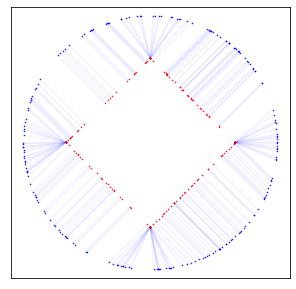

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def l1pro(v, r = 1.0):
    # Projektion auf L1-Kugel mit Radius r bzgl. eukl. Skalarpr.
    
    if np.linalg.norm(v, ord=1) > r:
        d = v.shape[0]

        # S, Vorzeichen merken fuer S_inv
        s = np.ones(v.shape)
        s[v < 0] = -1

        # PS anwenden
        w  = s * v
        ii = w.argsort()[::-1]
        w  = w[ii]

        # Projektion
        p  = np.arange(d) + 1
        cp = (w.cumsum() - r)/p
        u  = w - cp
        jj = np.where(u > 0)[0].max()

        ps  = p[jj]
        cps = cp[jj]

        y = np.zeros(v.shape)
        y[:ps] = w[:ps] - cps

        # P_inv und S_inv anwenden
        x = np.zeros(y.shape)
        # P_inv
        x[ii] = y
        # S_inv = S
        x = s*x
    else:
        x = v
        
    return x


np.random.seed(17)
plt.figure(figsize=(5,5))

d = 2
n = 200
l = 1.0
r = 2.0

for k in range(n):
    w = np.random.randn(d)
    w = w/np.linalg.norm(w)*(l+r)
    
    x = l1pro(w, r)

    plt.plot(*w, 'b.', markersize = 1)
    plt.plot(*np.c_[x, w], 'b', alpha = 0.05)
    plt.plot(*x, 'r.', markersize = 1)

plt.axis('equal')
plt.gca().set_xticks([])
plt.gca().set_yticks([]);

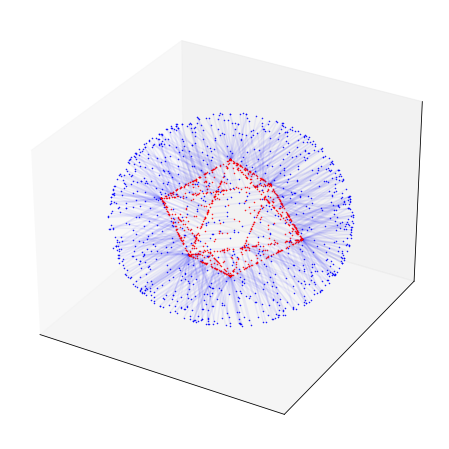

In [2]:
#%matplotlib notebook

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

plt.figure(figsize=(8,8))
plt.axes(projection='3d')

np.random.seed(17)


d = 3
n = 1000
l = 1.0
r = 2.0

for k in range(n):
    w = np.random.randn(d)
    w = w/np.linalg.norm(w)*(l + r)
    
    x = l1pro(w, r)
    
    plt.plot(*w, 'b.', markersize = 1)
    plt.plot(*np.c_[x, w], 'b', alpha = 0.05)
    plt.plot(*x, 'r.', markersize = 1)

#plt.axis('equal')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_zticks([]);

## Beispiel Tomographie

Bei den Regularisierungsverfahren hatten wir für unser Tomographieproblem unter anderem die Lasso-Methode kennen gelernt.
Dort bestimmt man
\begin{equation*} 
\mathrm{argmin}_{w\in\mathbb{R}^n}\frac{1}{2m}\| X w - y\|_2^2 + \alpha \|w\|_1,
\end{equation*}
wobei $\alpha > 0$ ein vom Benutzer zu wählender Regularisierungsparameter ist.

Dieses nicht restringierte Problem kann in das
restringierte Problem
\begin{equation*} 
\mathrm{argmin}_{\|w\|_1 \leq r}\frac{1}{2m}\| X w - y\|_2^2 
\end{equation*}
überführt werden, wobei die Rolle des Regularisierungsparameters
$\alpha$ jetzt von $r$ übernommen wird:

- für $r\to\infty$ ist $\|w\|_1 \leq r$ immer weniger
  einschränkend, man "regularisiert" immer weniger,
  was $\alpha\to 0$ entspricht
  
- für $r\to 0$ bleibt nur $w = 0$ als Lösung, d.h.
  man "regularisiert" maximal,
  was $\alpha\to \infty$ entspricht
  
Auf das restringierte Problem wenden wir Projected-Gradient-Descent
an und benutzen dabei die Projektion auf $B_r(0)_{\|\cdot\|_1}$
aus dem letzten Abschnitt.

Zum Vergleich berechnen wir
zunächst eine Rekonstruktion ohne Regularisierung.

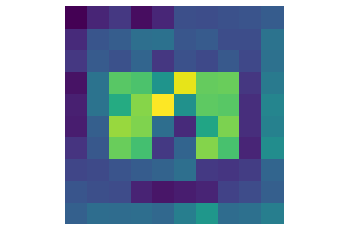

In [3]:
%matplotlib inline

np.random.seed(17)

from DatenNotebooks.xrtomo12 import *

def plotReko(b):
    n = int(np.sqrt(b.shape[0]))
    
    plt.pcolor(b.reshape(n,n))
    plt.axis('equal')
    plt.axis('off')
    
    
from sklearn import linear_model    
X, y, _ = tomo(delta = 0.01)

modell = linear_model.LinearRegression(fit_intercept = False)
modell.fit(X, y.ravel())

w = modell.coef_
plotReko(w)

Die Lasso-Implementierung aus Scikit-Learn liefert das folgende Ergebnis.

alpha = 9.867860e-06,   ||w||_1 = 20.221146


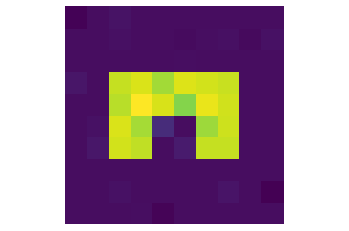

In [4]:
lassocv = linear_model.LassoCV(fit_intercept = False, cv = 5)

lassocv.fit(X, y)

w = lassocv.coef_
plotReko(w)

print('alpha = {:e},   ||w||_1 = {:f}'.format(lassocv.alpha_, np.linalg.norm(w, 1)))

Mit Projected Gradient erhalten wir ein sehr ähnliches Resultat.

r = 20.000000


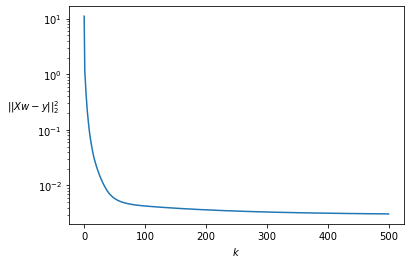

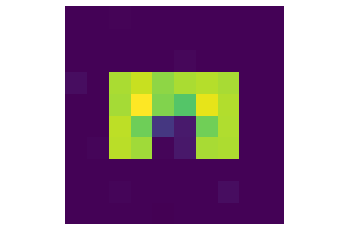

In [5]:
def l(w):
    return 0.5*((X.dot(w) - y)**2).sum()
    
def l1(w):
    return X.T.dot(X.dot(w) - y)

def GDp(w0, l1, pro, alpha = 1.0, nit = 10):
    w  = w0.copy()
    w = pro(w)
    
    ww = [w]
    
    for k in range(nit):
        w = w - alpha * l1(w)
        w = pro(w)
        ww.append(w)
    
    return ww


w0 = np.zeros(X.shape[1])

r = 20
pro1 = lambda w : l1pro(w, r)

ww = GDp(w0, l1, pro = pro1, alpha = 0.5, nit = 500)

plt.figure()
plt.semilogy(list(map(l, ww)))
plt.xlabel('$k$')
plt.ylabel('$||Xw-y||_2^2$', rotation=0)

w = ww[-1]
plt.figure()
plotReko(w)

print('r = {:f}'.format(r))

## Zusammenfassung

Für Projected-Gradient-Descent bei restringierten Optimierungsproblemen mit 
  $X\in\mathbb{R}^d$ abgeschlossen und konvex haben wir das selbe
  Konvergenzverhalten wie im nicht restringierten Fall nachgewiesen:

- $f$ konvex und Lipschitz-stetig, $\gamma = \frac{c}{\sqrt{T}}$, $c>0$:
    \begin{equation*} 
    \min_{t=0,\ldots,T-1}(f_t - f_\ast) \leq \varepsilon
    \quad \Rightarrow\quad
    T = \mathcal{O}\big(\frac{1}{\varepsilon^2}\big)
    \end{equation*}
    
- $f$ konvex und $L$-glatt, $0 < \gamma < \frac{2}{L}$:
    \begin{equation*} 
    f_{T}-f_\ast \leq \varepsilon
    \quad \Rightarrow\quad
    T =\mathcal{O}\big( \frac{1}{\varepsilon} \big)
    \end{equation*}  

- $f$ $\mu$-konvex mit $\mu>0$ und $L$-glatt, $0 < \gamma \leq \frac{1}{L}$:
    \begin{equation*} 
    f_{T}-f_\ast \leq \varepsilon
    \quad \Rightarrow\quad
    T = \mathcal{O}\Big( \log\big(\frac{1}{\varepsilon}\big) \Big)
    \end{equation*}
    
Das Berechnen der Projektion $\Pi_X$ auf $X\in\mathbb{R}^d$ abgeschlossen und konvex
  kann extrem aufwendig sein.
Für einige spezielle Mengen $X$ die in der Praxis häufig auftreten 
  lässt sich $\Pi_X$ einfach berechnen.